In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
#https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [2]:
SalaryData_Train = read_csv('SalaryData_Train(1).csv')
SalaryData_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
SalaryData_Test = read_csv('SalaryData_Test(1).csv')
SalaryData_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
SalaryData_Train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
SalaryData_Train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [8]:
SalaryData_Train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [10]:
SalaryData_Train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
SalaryData_Train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
SalaryData_Train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
SalaryData_Train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
SalaryData_Train['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
SalaryData_Train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [16]:
SalaryData_Train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [3]:
#Strip trailing/leading spaces from data
SalaryData_Train['Salary'] = SalaryData_Train['Salary'].str.strip()
SalaryData_Train['native'] = SalaryData_Train['native'].str.strip()
SalaryData_Train['race'] = SalaryData_Train['race'].str.strip()
SalaryData_Train['relationship'] = SalaryData_Train['relationship'].str.strip()
SalaryData_Train['occupation'] = SalaryData_Train['occupation'].str.strip()
SalaryData_Train['maritalstatus'] = SalaryData_Train['maritalstatus'].str.strip()
SalaryData_Train['education'] = SalaryData_Train['education'].str.strip()
SalaryData_Train['workclass'] = SalaryData_Train['workclass'].str.strip()
SalaryData_Train['native'].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary'],
      dtype=object)

In [4]:
SalaryData_Train['sex'].replace([' Male',' Female'],[0,1],inplace=True)

In [22]:
SalaryData_Train['sex'].unique()

array([0, 1], dtype=int64)

In [5]:
SalaryData_Train_Dummies = pd.get_dummies(SalaryData_Train, columns=['native','race','relationship','occupation','maritalstatus','education','workclass'])
SalaryData_Train_Dummies

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,native_Cambodia,native_Canada,native_China,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,13,0,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,0,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,13,1,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,1,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30157,40,9,0,0,0,40,>50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30158,58,9,1,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30159,22,9,0,0,0,20,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
SalaryData_Train_Dummies.columns

Index(['age', 'educationno', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'Salary', 'native_Cambodia', 'native_Canada',
       'native_China',
       ...
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay'],
      dtype='object', length=102)

In [6]:
#Standardize these columns age, educationno, capitalgain, capitalloss, hoursperweek
SalaryData_Train_Dummies_stndrd = SalaryData_Train_Dummies[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
SalaryData_Train_Dummies_stndrd

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30156,27,12,0,0,38
30157,40,9,0,0,40
30158,58,9,0,0,40
30159,22,9,0,0,20


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#Making whole data into one format
sc= StandardScaler()
sc.fit(SalaryData_Train_Dummies_stndrd)
SalaryData_Train_Dummies_stndrd = sc.transform(SalaryData_Train_Dummies_stndrd)
SalaryData_Train_Dummies_stndrd

array([[ 0.04277892,  1.12889813,  0.14608503, -0.21850808, -0.07773541],
       [ 0.88026081,  1.12889813, -0.14744712, -0.21850808, -2.33149486],
       [-0.0333558 , -0.4397325 , -0.14744712, -0.21850808, -0.07773541],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, -0.21850808, -0.07773541],
       [-1.25151126, -0.4397325 , -0.14744712, -0.21850808, -1.74718685],
       [ 1.03253024, -0.4397325 ,  1.88108414, -0.21850808, -0.07773541]])

In [9]:
SalaryData_Train_Dummies_stndrd[:,4:5]

array([[-0.07773541],
       [-2.33149486],
       [-0.07773541],
       ...,
       [-0.07773541],
       [-1.74718685],
       [-0.07773541]])

In [9]:
SalaryData_Train_Dummies['age'] = SalaryData_Train_Dummies_stndrd[:,:1]
SalaryData_Train_Dummies['educationno'] = SalaryData_Train_Dummies_stndrd[:,1:2]
SalaryData_Train_Dummies['capitalgain'] = SalaryData_Train_Dummies_stndrd[:,2:3]
SalaryData_Train_Dummies['capitalloss'] = SalaryData_Train_Dummies_stndrd[:,3:4]
SalaryData_Train_Dummies['hoursperweek'] = SalaryData_Train_Dummies_stndrd[:,4:5]
SalaryData_Train_Dummies


,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,native_Cambodia,native_Canada,native_China,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.042779,1.128898,0,0.146085,-0.218508,-0.077735,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.880261,1.128898,0,-0.147447,-0.218508,-2.331495,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.033356,-0.439733,0,-0.147447,-0.218508,-0.077735,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.108665,-1.224048,0,-0.147447,-0.218508,-0.077735,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.794703,1.128898,1,-0.147447,-0.218508,-0.077735,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,0.736740,1,-0.147447,-0.218508,-0.244681,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30157,0.118914,-0.439733,0,-0.147447,-0.218508,-0.077735,>50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30158,1.489339,-0.439733,1,-0.147447,-0.218508,-0.077735,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30159,-1.251511,-0.439733,0,-0.147447,-0.218508,-1.747187,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
SalaryData_Train_Dummies.columns.tolist()

['age',
 'educationno',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'Salary',
 'native_Cambodia',
 'native_Canada',
 'native_China',
 'native_Columbia',
 'native_Cuba',
 'native_Dominican-Republic',
 'native_Ecuador',
 'native_El-Salvador',
 'native_England',
 'native_France',
 'native_Germany',
 'native_Greece',
 'native_Guatemala',
 'native_Haiti',
 'native_Honduras',
 'native_Hong',
 'native_Hungary',
 'native_India',
 'native_Iran',
 'native_Ireland',
 'native_Italy',
 'native_Jamaica',
 'native_Japan',
 'native_Laos',
 'native_Mexico',
 'native_Nicaragua',
 'native_Outlying-US(Guam-USVI-etc)',
 'native_Peru',
 'native_Philippines',
 'native_Poland',
 'native_Portugal',
 'native_Puerto-Rico',
 'native_Scotland',
 'native_South',
 'native_Taiwan',
 'native_Thailand',
 'native_Trinadad&Tobago',
 'native_United-States',
 'native_Vietnam',
 'native_Yugoslavia',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'relations

In [10]:
SalaryData_Train_Dummies = SalaryData_Train_Dummies[['age',  'educationno',  'sex',  'capitalgain',  'capitalloss',  'hoursperweek',  'native_Cambodia',  'native_Canada',  'native_China',  'native_Columbia',  'native_Cuba',  'native_Dominican-Republic',  'native_Ecuador',  'native_El-Salvador',  'native_England',  'native_France',  'native_Germany',  'native_Greece',  'native_Guatemala',  'native_Haiti',  'native_Honduras',  'native_Hong',  'native_Hungary',  'native_India',  'native_Iran',  'native_Ireland',  'native_Italy',  'native_Jamaica',  'native_Japan',  'native_Laos',  'native_Mexico',  'native_Nicaragua',  'native_Outlying-US(Guam-USVI-etc)',  'native_Peru',  'native_Philippines',  'native_Poland',  'native_Portugal',  'native_Puerto-Rico',  'native_Scotland',  'native_South',  'native_Taiwan',  'native_Thailand',  'native_Trinadad&Tobago',  'native_United-States',  'native_Vietnam',  'native_Yugoslavia',  'race_Amer-Indian-Eskimo',  'race_Asian-Pac-Islander',  'race_Black',  'race_Other',  'race_White',  'relationship_Husband',  'relationship_Not-in-family',  'relationship_Other-relative',  'relationship_Own-child',  'relationship_Unmarried',  'relationship_Wife',  'occupation_Adm-clerical',  'occupation_Armed-Forces',  'occupation_Craft-repair',  'occupation_Exec-managerial',  'occupation_Farming-fishing',  'occupation_Handlers-cleaners',  'occupation_Machine-op-inspct',  'occupation_Other-service',  'occupation_Priv-house-serv',  'occupation_Prof-specialty',  'occupation_Protective-serv',  'occupation_Sales',  'occupation_Tech-support',  'occupation_Transport-moving',  'maritalstatus_Divorced',  'maritalstatus_Married-AF-spouse',  'maritalstatus_Married-civ-spouse',  'maritalstatus_Married-spouse-absent',  'maritalstatus_Never-married',  'maritalstatus_Separated',  'maritalstatus_Widowed',  'education_10th',  'education_11th',  'education_12th',  'education_1st-4th',  'education_5th-6th',  'education_7th-8th',  'education_9th',  'education_Assoc-acdm',  'education_Assoc-voc',  'education_Bachelors',  'education_Doctorate',  'education_HS-grad',  'education_Masters',  'education_Preschool',  'education_Prof-school',  'education_Some-college',  'workclass_Federal-gov',  'workclass_Local-gov',  'workclass_Private',  'workclass_Self-emp-inc',  'workclass_Self-emp-not-inc',  'workclass_State-gov',  'workclass_Without-pay',  'Salary']]
SalaryData_Train_Dummies

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,native_Cambodia,native_Canada,native_China,native_Columbia,...,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Salary
0,0.042779,1.128898,0,0.146085,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,0,0,0,1,0,<=50K
1,0.880261,1.128898,0,-0.147447,-0.218508,-2.331495,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,-0.033356,-0.439733,0,-0.147447,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
3,1.108665,-1.224048,0,-0.147447,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
4,-0.794703,1.128898,1,-0.147447,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,0.736740,1,-0.147447,-0.218508,-0.244681,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
30157,0.118914,-0.439733,0,-0.147447,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,1,0,0,0,0,>50K
30158,1.489339,-0.439733,1,-0.147447,-0.218508,-0.077735,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
30159,-1.251511,-0.439733,0,-0.147447,-0.218508,-1.747187,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K


In [11]:
array = SalaryData_Train_Dummies.values
X = array[:,0:101]
Y = array[:,101]
Y

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [12]:
X

array([[0.04277892130002011, 1.1288981324922922, 0, ..., 0, 1, 0],
       [0.8802608059184714, 1.1288981324922922, 0, ..., 1, 0, 0],
       [-0.03335579548347547, -0.43973250300480693, 0, ..., 0, 0, 0],
       ...,
       [1.489338540186436, -0.43973250300480693, 1, ..., 0, 0, 0],
       [-1.2515112640194048, -0.43973250300480693, 0, ..., 0, 0, 0],
       [1.0325302394854627, -0.43973250300480693, 1, ..., 0, 0, 0]],
      dtype=object)

In [13]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X,Y)

SVC(random_state=1)

In [14]:
SalaryData_Test = read_csv('SalaryData_Test(1).csv')
SalaryData_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [15]:
#Strip trailing/leading spaces from data
SalaryData_Test['Salary'] = SalaryData_Test['Salary'].str.strip()
SalaryData_Test['native'] = SalaryData_Test['native'].str.strip()
SalaryData_Test['race'] = SalaryData_Test['race'].str.strip()
SalaryData_Test['relationship'] = SalaryData_Test['relationship'].str.strip()
SalaryData_Test['occupation'] = SalaryData_Test['occupation'].str.strip()
SalaryData_Test['maritalstatus'] = SalaryData_Test['maritalstatus'].str.strip()
SalaryData_Test['education'] = SalaryData_Test['education'].str.strip()
SalaryData_Test['workclass'] = SalaryData_Test['workclass'].str.strip()
SalaryData_Test['native'].unique()


array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [16]:
SalaryData_Test['sex'].replace([' Male',' Female'],[0,1],inplace=True)
SalaryData_Test['sex'].unique()

array([0, 1], dtype=int64)

In [17]:
SalaryData_Test_Dummies = pd.get_dummies(SalaryData_Test, columns=['native','race','relationship','occupation','maritalstatus','education','workclass'])
SalaryData_Test_Dummies

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,native_Cambodia,native_Canada,native_China,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,25,7,0,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38,9,0,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,12,0,0,0,40,>50K,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,44,10,0,7688,0,40,>50K,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,34,6,0,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15056,39,13,1,0,0,36,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15057,38,13,0,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15058,44,13,0,5455,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
#Standardize these columns age, educationno, capitalgain, capitalloss, hoursperweek
SalaryData_Test_Dummies_stndrd = SalaryData_Test_Dummies[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
SalaryData_Test_Dummies_stndrd

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


In [19]:
#Making whole data into one format
sc.fit(SalaryData_Test_Dummies_stndrd)
SalaryData_Test_Dummies_stndrd = sc.transform(SalaryData_Test_Dummies_stndrd)
SalaryData_Test_Dummies_stndrd

array([[-1.02900513, -1.2165628 , -0.14543845, -0.2191694 , -0.07888904],
       [-0.05742253, -0.43489824, -0.14543845, -0.2191694 ,  0.75013125],
       [-0.80479376,  0.73759862, -0.14543845, -0.2191694 , -0.07888904],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, -0.2191694 ,  0.75013125],
       [ 0.39100021,  1.1284309 ,  0.562734  , -0.2191694 , -0.07888904],
       [-0.2816339 ,  1.1284309 , -0.14543845, -0.2191694 ,  1.57915155]])

In [20]:
SalaryData_Test_Dummies['age'] = SalaryData_Test_Dummies_stndrd[:,:1]
SalaryData_Test_Dummies['educationno'] = SalaryData_Test_Dummies_stndrd[:,1:2]
SalaryData_Test_Dummies['capitalgain'] = SalaryData_Test_Dummies_stndrd[:,2:3]
SalaryData_Test_Dummies['capitalloss'] = SalaryData_Test_Dummies_stndrd[:,3:4]
SalaryData_Test_Dummies['hoursperweek'] = SalaryData_Test_Dummies_stndrd[:,4:5]
SalaryData_Test_Dummies


,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,native_Cambodia,native_Canada,native_China,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-1.029005,-1.216563,0,-0.145438,-0.219169,-0.078889,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.057423,-0.434898,0,-0.145438,-0.219169,0.750131,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.804794,0.737599,0,-0.145438,-0.219169,-0.078889,>50K,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.391000,-0.044066,0,0.852624,-0.219169,-0.078889,>50K,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.356371,-1.607395,0,-0.145438,-0.219169,-0.907909,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,1.128431,0,-0.145438,-0.219169,-0.078889,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15056,0.017315,1.128431,1,-0.145438,-0.219169,-0.410497,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15057,-0.057423,1.128431,0,-0.145438,-0.219169,0.750131,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15058,0.391000,1.128431,0,0.562734,-0.219169,-0.078889,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
SalaryData_Test_Dummies = SalaryData_Test_Dummies[['age',  'educationno',  'sex',  'capitalgain',  'capitalloss',  'hoursperweek',  'native_Cambodia',  'native_Canada',  'native_China',  'native_Columbia',  'native_Cuba',  'native_Dominican-Republic',  'native_Ecuador',  'native_El-Salvador',  'native_England',  'native_France',  'native_Germany',  'native_Greece',  'native_Guatemala',  'native_Haiti',  'native_Honduras',  'native_Hong',  'native_Hungary',  'native_India',  'native_Iran',  'native_Ireland',  'native_Italy',  'native_Jamaica',  'native_Japan',  'native_Laos',  'native_Mexico',  'native_Nicaragua',  'native_Outlying-US(Guam-USVI-etc)',  'native_Peru',  'native_Philippines',  'native_Poland',  'native_Portugal',  'native_Puerto-Rico',  'native_Scotland',  'native_South',  'native_Taiwan',  'native_Thailand',  'native_Trinadad&Tobago',  'native_United-States',  'native_Vietnam',  'native_Yugoslavia',  'race_Amer-Indian-Eskimo',  'race_Asian-Pac-Islander',  'race_Black',  'race_Other',  'race_White',  'relationship_Husband',  'relationship_Not-in-family',  'relationship_Other-relative',  'relationship_Own-child',  'relationship_Unmarried',  'relationship_Wife',  'occupation_Adm-clerical',  'occupation_Armed-Forces',  'occupation_Craft-repair',  'occupation_Exec-managerial',  'occupation_Farming-fishing',  'occupation_Handlers-cleaners',  'occupation_Machine-op-inspct',  'occupation_Other-service',  'occupation_Priv-house-serv',  'occupation_Prof-specialty',  'occupation_Protective-serv',  'occupation_Sales',  'occupation_Tech-support',  'occupation_Transport-moving',  'maritalstatus_Divorced',  'maritalstatus_Married-AF-spouse',  'maritalstatus_Married-civ-spouse',  'maritalstatus_Married-spouse-absent',  'maritalstatus_Never-married',  'maritalstatus_Separated',  'maritalstatus_Widowed',  'education_10th',  'education_11th',  'education_12th',  'education_1st-4th',  'education_5th-6th',  'education_7th-8th',  'education_9th',  'education_Assoc-acdm',  'education_Assoc-voc',  'education_Bachelors',  'education_Doctorate',  'education_HS-grad',  'education_Masters',  'education_Preschool',  'education_Prof-school',  'education_Some-college',  'workclass_Federal-gov',  'workclass_Local-gov',  'workclass_Private',  'workclass_Self-emp-inc',  'workclass_Self-emp-not-inc',  'workclass_State-gov',  'workclass_Without-pay',  'Salary']]
SalaryData_Test_Dummies

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,native_Cambodia,native_Canada,native_China,native_Columbia,...,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Salary
0,-1.029005,-1.216563,0,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
1,-0.057423,-0.434898,0,-0.145438,-0.219169,0.750131,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
2,-0.804794,0.737599,0,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,0,1,0,0,0,0,0,>50K
3,0.391000,-0.044066,0,0.852624,-0.219169,-0.078889,0,0,0,0,...,0,1,0,0,1,0,0,0,0,>50K
4,-0.356371,-1.607395,0,-0.145438,-0.219169,-0.907909,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,1.128431,0,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
15056,0.017315,1.128431,1,-0.145438,-0.219169,-0.410497,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
15057,-0.057423,1.128431,0,-0.145438,-0.219169,0.750131,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
15058,0.391000,1.128431,0,0.562734,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K


In [22]:
array_test = SalaryData_Test_Dummies.values
X_test = array_test[:,0:101]
Y_test = array_test[:,101]
Y_test

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [23]:
X_test

array([[-1.0290051311009436, -1.216562804930528, 0, ..., 0, 0, 0],
       [-0.0574225268842155, -0.43489823552680973, 0, ..., 0, 0, 0],
       [-0.8047937608970832, 0.7375986185787675, 0, ..., 0, 0, 0],
       ...,
       [-0.0574225268842155, 1.1284309032806268, 0, ..., 0, 0, 0],
       [0.39100021352350517, 1.1284309032806268, 0, ..., 0, 0, 0],
       [-0.28163389708807585, 1.1284309032806268, 0, ..., 0, 0, 0]],
      dtype=object)

In [24]:
Y_pred = classifier.predict(X_test)
Y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '>50K'],
      dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8536520584329349


# Here the algorithm ends. Below code i have tried to use Grid Search CV, it is running forever; tried by reducing demionality by PCA and TSNE even but no luck (Code running forever)

# Grid Search CV

In [14]:
#https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be
#Above link states What is C and Gamma below

In [ ]:
clf = SVC()
#param_grid = [{'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'C':[0.001, 0.01, 0.1, 1, 10, 100] }] - Running forever
param_grid = [{'kernel':['rbf'],'gamma':[0.01, 0.1, 1, 10],'C':[0.01, 0.1, 1, 10] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

# USE PCA to reduce features, as increase/decrease of gamma & c is running the code forever

In [15]:
#Above code is running forever, so i am using PCA to reduce dimensionality as we have 102 columns
from sklearn.decomposition import PCA
pca = PCA()
pca_X = pca.fit_transform(X)
pca_X

array([[ 2.94803648e-01,  1.24982688e+00,  5.15047814e-02, ...,
        -2.43423150e-15,  9.00828824e-16, -9.73713630e-16],
       [ 3.41988180e-01,  8.10923969e-02,  3.97711859e-02, ...,
        -2.48471080e-15,  3.32894840e-15,  4.47590329e-16],
       [-5.23867623e-01, -3.71000381e-01,  1.66155653e-01, ...,
        -4.44859744e-16,  5.58601853e-16, -5.70143577e-16],
       ...,
       [ 1.05481165e-01, -1.21687274e+00,  3.28014613e-01, ...,
         6.39799687e-18,  7.64882610e-18, -1.70411565e-17],
       [-2.22808411e+00,  5.43413494e-01,  2.72596463e-02, ...,
         1.89523755e-17,  1.98085510e-17, -2.40140026e-17],
       [ 9.70782952e-01, -5.52195997e-01,  1.45424952e+00, ...,
         3.04767553e-17, -3.88152545e-18, -1.56755413e-17]])

In [16]:
# The amount of variance that each PCA explains is 
var_witOutSal = pca.explained_variance_ratio_
var_witOutSal

array([1.69732528e-01, 1.21374988e-01, 1.12332815e-01, 9.88159998e-02,
       9.28448262e-02, 6.01515920e-02, 2.81441484e-02, 2.56037101e-02,
       2.44519660e-02, 2.06509185e-02, 1.81082598e-02, 1.76773340e-02,
       1.51572756e-02, 1.47830799e-02, 1.32156810e-02, 1.26238181e-02,
       1.15407847e-02, 1.00130141e-02, 9.85179080e-03, 9.24526976e-03,
       8.58161398e-03, 7.95712850e-03, 6.80076528e-03, 6.05284108e-03,
       5.57465007e-03, 5.43616599e-03, 4.94251474e-03, 4.82101601e-03,
       4.64442684e-03, 4.17318581e-03, 3.91935747e-03, 3.86737804e-03,
       3.67743786e-03, 3.58278743e-03, 3.50081728e-03, 3.41849403e-03,
       3.02420510e-03, 2.91640912e-03, 2.64123351e-03, 2.15646564e-03,
       2.08096629e-03, 1.80144158e-03, 1.64244708e-03, 1.54423303e-03,
       1.50828306e-03, 1.40056439e-03, 1.36387194e-03, 9.90136454e-04,
       9.02035423e-04, 6.45675787e-04, 5.66928872e-04, 5.37220964e-04,
       4.45514665e-04, 3.85489636e-04, 3.68640753e-04, 3.61452100e-04,
      

In [17]:
# Cumulative variance 
var1_witOutSal = np.cumsum(np.round(var_witOutSal,decimals = 4)*100)
var1_witOutSal

array([ 16.97,  29.11,  40.34,  50.22,  59.5 ,  65.52,  68.33,  70.89,
        73.34,  75.41,  77.22,  78.99,  80.51,  81.99,  83.31,  84.57,
        85.72,  86.72,  87.71,  88.63,  89.49,  90.29,  90.97,  91.58,
        92.14,  92.68,  93.17,  93.65,  94.11,  94.53,  94.92,  95.31,
        95.68,  96.04,  96.39,  96.73,  97.03,  97.32,  97.58,  97.8 ,
        98.01,  98.19,  98.35,  98.5 ,  98.65,  98.79,  98.93,  99.03,
        99.12,  99.18,  99.24,  99.29,  99.33,  99.37,  99.41,  99.45,
        99.48,  99.51,  99.54,  99.57,  99.6 ,  99.63,  99.65,  99.67,
        99.69,  99.71,  99.73,  99.75,  99.77,  99.79,  99.81,  99.83,
        99.84,  99.85,  99.86,  99.87,  99.88,  99.89,  99.9 ,  99.91,
        99.92,  99.93,  99.94,  99.95,  99.96,  99.97,  99.98,  99.99,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

In [19]:
import matplotlib.pyplot as plt

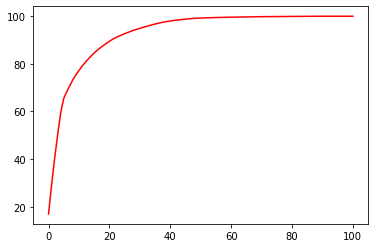

In [20]:
# Variance plot for PCA components obtained 
plt.plot(var1_witOutSal,color="red")

In [23]:
PCA_X_df = pd.concat([pd.DataFrame(pca_X[:,0:58])], axis = 1)
PCA_X_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.294804,1.249827,0.051505,0.196405,-0.738643,0.575522,-0.049862,-0.875922,0.498943,0.043082,...,0.006506,0.006898,0.004803,0.016285,-0.000596,-0.001183,-0.003751,-0.003998,-0.000366,-0.004033
1,0.341988,0.081092,0.039771,1.901592,-1.856542,-1.395080,-0.065721,-0.426277,0.529690,-0.109321,...,0.007650,0.006222,0.004462,-0.000006,0.000697,0.001484,-0.000051,0.001200,0.004086,0.004638
2,-0.523868,-0.371000,0.166156,-0.146435,0.062818,0.692608,-0.713101,-0.353066,-0.316914,-0.505474,...,0.011727,0.003726,-0.000017,-0.002949,-0.001715,0.001977,0.001175,0.003319,0.001355,0.000453
3,0.142354,-1.777272,0.386910,0.117877,0.028392,-0.356681,0.322238,0.174041,-0.176021,1.254598,...,0.004936,-0.020221,-0.004661,-0.008562,0.001091,-0.003162,-0.001699,-0.000334,0.009075,-0.007229
4,0.083488,1.332597,-0.150395,-0.111826,-0.641901,-0.334503,-0.086985,1.210244,-0.031233,1.074131,...,-0.054557,-0.021580,-0.029469,-0.014076,-0.125123,0.001700,-0.261002,0.039402,-0.565154,-0.225109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.276984,0.920542,-0.088323,-0.096524,-0.341420,-0.471984,-0.042678,0.857171,-0.242307,-0.403814,...,-0.001183,0.000550,-0.010131,-0.016364,0.000017,0.005134,0.008842,0.024721,-0.001602,0.001085
30157,0.035760,-0.837597,0.205118,-0.221776,0.114128,-0.785866,-0.642710,0.091914,-0.259248,-0.102966,...,-0.007078,0.003879,-0.000341,0.003013,0.001720,-0.001075,0.000060,0.003083,0.001153,0.002292
30158,0.105481,-1.216873,0.328015,0.506628,-0.584870,1.176938,-0.513836,0.807255,-0.177476,-0.227304,...,0.008573,-0.015616,-0.002728,-0.021359,-0.005433,-0.002780,-0.004255,0.001236,0.002499,0.000557
30159,-2.228084,0.543413,0.027260,0.718058,0.154953,-0.593299,-0.677490,-0.176296,0.113919,-0.114934,...,0.003431,0.007468,0.004339,0.003617,0.001839,0.000584,0.002078,0.005354,-0.003425,-0.000384


In [24]:
array_pca = PCA_X_df.values
X_pca = array_pca[:,0:58]
X_pca

array([[ 2.94803648e-01,  1.24982688e+00,  5.15047814e-02, ...,
        -3.99803424e-03, -3.65982507e-04, -4.03273673e-03],
       [ 3.41988180e-01,  8.10923969e-02,  3.97711859e-02, ...,
         1.20001166e-03,  4.08606641e-03,  4.63807693e-03],
       [-5.23867623e-01, -3.71000381e-01,  1.66155653e-01, ...,
         3.31943592e-03,  1.35484940e-03,  4.53333954e-04],
       ...,
       [ 1.05481165e-01, -1.21687274e+00,  3.28014613e-01, ...,
         1.23602017e-03,  2.49869797e-03,  5.56555433e-04],
       [-2.22808411e+00,  5.43413494e-01,  2.72596463e-02, ...,
         5.35428364e-03, -3.42480915e-03, -3.84206433e-04],
       [ 9.70782952e-01, -5.52195997e-01,  1.45424952e+00, ...,
         2.14673744e-02,  2.77619702e-03,  1.11028429e-02]])

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_pca,Y)